In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=datasets.load_wine()
y=df.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### KMeans clustering
(метод k-середніх -ітеративний алгоритм кластеризації, що грунтується на мінімізації сумарних квадратичних відхилень координат точок кластерів від центроїдів цих кластерів)

In [3]:
model = KMeans(n_clusters=3)

In [4]:
model.fit(df.data)

KMeans(n_clusters=3)

In [5]:
labels=model.labels_

In [6]:
def cf_metrics(ds, labels, y):
    print(f"Homogeneity: {metrics.homogeneity_score(y, labels): .3f}")
    print(f"Completeness: {metrics.completeness_score(y, labels): .3f}")
    print(f"V-measure: {metrics.v_measure_score(y, labels): .3f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels): .3f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, labels): .3f}")
    print(f"Silhouette Coefficient: {metrics.silhouette_score(ds.data, labels): .3f}")
    

In [7]:
cf_metrics(df,labels,y)

Homogeneity:  0.429
Completeness:  0.429
V-measure:  0.429
Adjusted Rand Index:  0.371
Adjusted Mutual Information:  0.423
Silhouette Coefficient:  0.571


In [8]:
predictions = model.predict(df.data)
predictions
#отримали результати кластернізації елементів

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [9]:
cluster_0 = df.data[predictions == 0]
cluster_1 = df.data[predictions == 1]
cluster_2 = df.data[predictions == 2]

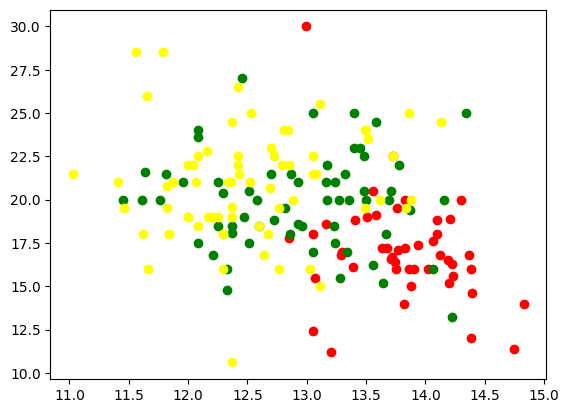

In [10]:
plt.scatter(cluster_0[:,0] , cluster_0[0:,3] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[0:,3] , color = 'green')
plt.scatter(cluster_2[:,0] , cluster_2[0:,3] , color = 'yellow')

### DBSCAN 
(кластеризація на основі щільності -алгоритм просторової кластеризації з урахуванням шуму)

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [12]:
#створюємо модель DBSCAN та передаємо на неї параметри:мін відстань між сусідніми об'єктами eps та мін кількість сусідів min_samples)
dbscan = DBSCAN(eps=30, min_samples=10)

In [13]:
dbscan.fit(df.data)

DBSCAN(eps=30, min_samples=10)

In [14]:
#декомпозиція упорядковує елементи у двовимірному просторі(n_components=2)
pca = PCA(n_components=2).fit(df.data)
pca_2d = pca.transform(df.data)
dbscan.labels_

array([ 1,  1, -1, -1, -1, -1,  0,  0,  1,  1, -1,  0, -1, -1, -1,  0,  0,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1,  2, -1,  1,  1, -1,  1,  0, -1,
        0, -1, -1,  1, -1, -1,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1, -1, -1,  2,  2, -1, -1,  2,  2,  2, -1,  2, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, -1,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,
        2,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,
        2,  2,  2, -1, -1, -1, -1,  2], dtype=int64)

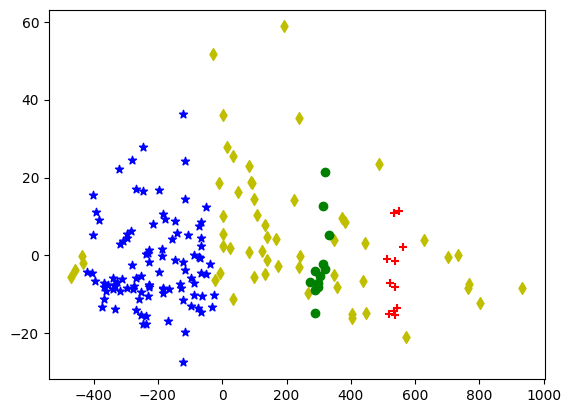

In [15]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

In [16]:
labels=model.labels_
y=df.target
cf_metrics(df,labels,y)

Homogeneity:  0.429
Completeness:  0.429
V-measure:  0.429
Adjusted Rand Index:  0.371
Adjusted Mutual Information:  0.423
Silhouette Coefficient:  0.571


### Ієрархічна кластерізація 
(будує ієрархію розмежування кластерів)

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [18]:
mergings = linkage(df.data, method = 'complete')

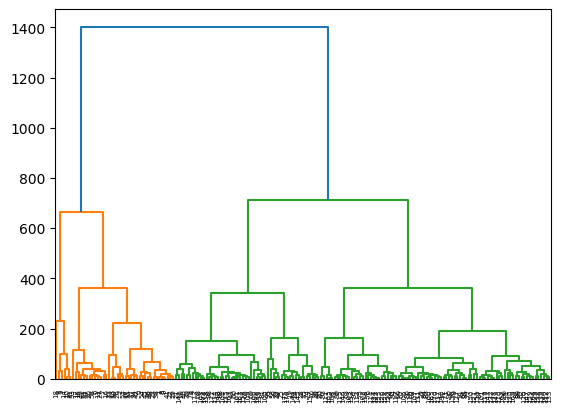

In [19]:
clusters = dendrogram(mergings,leaf_rotation=90)